# Basic summary of what this capstone will, and may accomplish

* Scrape data from indeed, and return job postings
* properly format location, title, requirements
* analyze what words and requirements occur the most
* Determine the quality of each job posting (how generic does it sound, and how common are the phrases that they are using) - this is important, but needs a bit of refinement

Stretch goals
* add input to allow users to specifiy the cities to look at

* add a map to visualize how many postings there are in each city 

In [1]:
import scrapy
from scrapy.crawler import CrawlerProcess
import requests
import bs4
from bs4 import BeautifulSoup
import pandas as pd
import time
import os
import matplotlib.pyplot as plt
import seaborn as sns

import re

# Plotly packages
import plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly import tools
import cufflinks as cf
import ipywidgets as widgets
from scipy import special
py.offline.init_notebook_mode(connected=True)

In [2]:
DC_data = pd.read_csv('data/dc_data_scientist_indeed.csv')

In [3]:
# Let's check up on the size of our dataframe
DC_data.shape

(179, 6)

In [4]:
# Print out the dataframe
DC_data

,Unnamed: 0,Title,Location,Company,Salary,Synopsis
0,0,Data Analyst,None,Indeed Prime,None,Indeed Prime is a ...
1,1,Data Analyst,None,Callahan & Associates,None,Hands on experienc...
2,2,Data Scientist - Human Capital Analytics,None,Leidos,None,"Review, assess dat..."
3,3,Oracle Database Analyst,None,"Economic Systems, Inc",None,Implement data mod...
4,4,Database Analyst,None,"Lumark Technologies, Inc.",None,Identify data sour...
5,5,Senior Data Encryption Analyst,None,ASRC Federal Holding Company,None,ASRC Federal Data ...
6,6,Health Interventions and Claims Data Analyst,"Washington, DC",Innovation Center for Biomedical Infor...,None,We are working on applying data sc...
7,7,Data Analyst 1 - Petroleum Supply,"Washington, DC",IMG Crown Energy Services Joint Venture,"\r\n $40,000 - $45,000 a year",Supporting the data validation tea...
8,8,REMEDY Data Analyst,"Pentagon, DC",Intellect Solutions,"\r\n $60,000 - $75,000 a year",The candidate will have an active ...
9,9,Political Data Analyst - Outside Groups,"Washington, DC",Data Trust,None,Data Trust is currently seeking a Data Analyst...


In [5]:
# Clean up location column to follow 'city, state'
for i, row in DC_data.iterrows():
    (DC_data['Location'][i]) = ' '.join((DC_data['Location'][i]).split(' ', 2)[:2]) 

In [6]:
# Print number of unique categories for all non-numerical columns
DC_data.select_dtypes(include=['object']).nunique()

Title       26
Location    11
Company     28
Salary       9
Synopsis    46
dtype: int64

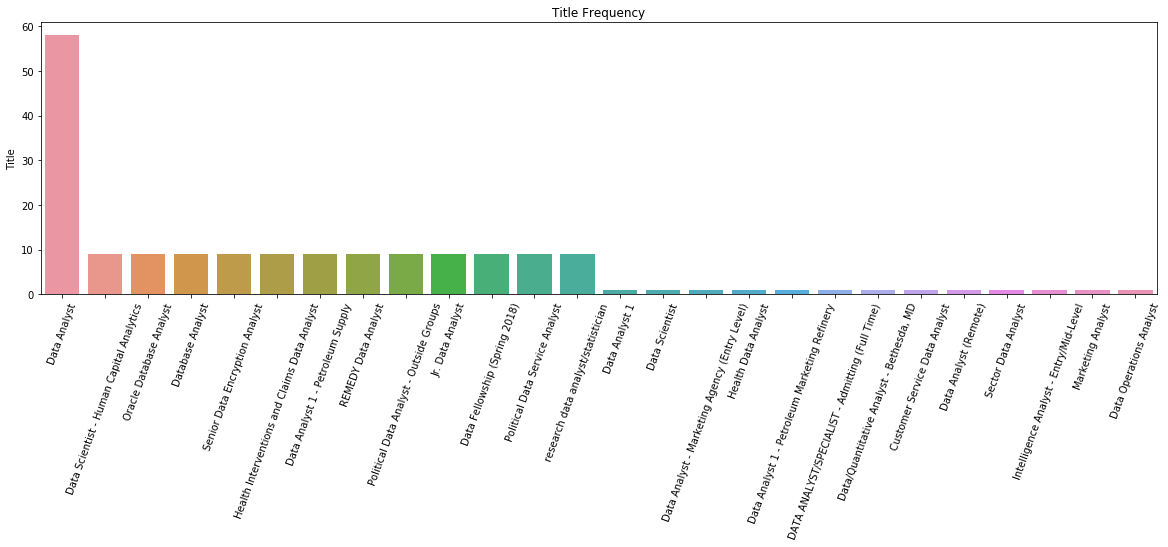

In [7]:
plt.rcParams['figure.figsize'] = [20,5]
plt.xticks(rotation=70)
plt.title('Title Frequency')

sns.barplot(DC_data['Title'].unique(), DC_data['Title'].value_counts(), data=DC_data)

In [8]:
DC_data['Title'].value_counts()

Data Analyst                                       58
Data Analyst 1 - Petroleum Marketing Refinery       9
Database Analyst                                    9
Data Analyst (Remote)                               9
Data Scientist - Human Capital Analytics            9
Data/Quantitative Analyst - Bethesda, MD            9
Customer Service Data Analyst                       9
Health Data Analyst                                 9
Oracle Database Analyst                             9
DATA ANALYST/SPECIALIST - Admitting (Full Time)     9
Senior Data Encryption Analyst                      9
Data Scientist                                      9
Data Analyst - Marketing Agency (Entry Level)       9
Jr. Data Analyst                                    1
Data Analyst 1 - Petroleum Supply                   1
research data analyst/statistician                  1
Data Analyst 1                                      1
Data Operations Analyst                             1
Health Interventions and Cla

In [9]:
DC_data['Location'].value_counts()

None              79
Washington, DC    51
Rockville, MD      9
Vienna, VA         9
Columbia, MD       9
Reston, VA         9
Herndon, VA        9
Alexandria, VA     1
Pentagon, DC       1
Arlington, VA      1
Fulton, MD         1
Name: Location, dtype: int64